In [20]:
#Question 1


import numpy as np


def amplitude(P, M_planet, M_star, i):
    '''
    function to calculate the amplitude
    P in days
    M_planet in Jupiter masses
    M_star in solar masses
    i is the inclination in radians
    returns in unit: 
    '''
    c = 24*60*60*1.898e27/(1.989e30 + 1.898e27)**(2/3)
    G = 6.67e-11
    return((1/c)*(2*np.pi*G/P)**(1/3)*(M_planet*np.sin(i)/(M_planet+M_star)**(2/3)))
    
print("The amplitude of Jupiter is",amplitude(4332.71, 1., 1., np.pi/2))
print("The amplitude of Earth is",amplitude(365, 1./318, 1., np.pi/2))

The amplitude of Jupiter is 2.79073170355e-17
The amplitude of Earth is 3.17120394848e-19


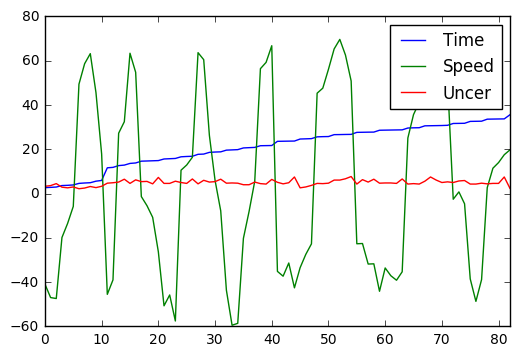

In [15]:
#Question 2

import pandas as pd
import matplotlib.pyplot as plt


column_names = ['Time', 'Speed', 'Uncer']

Data = pd.read_table('Data/51Peg mayorqueloz95.dat', sep = '\s+', names = column_names)

Data.plot()
plt.show()